In [26]:
# Initial imports
import numpy as np
import pandas as pd
from stockstats import StockDataFrame as sdf
import requests
from dotenv import load_dotenv
import os
import pandas as pd
import numpy as np
import alpaca_trade_api as tradeapi
from pathlib import Path
import lib_copy
%matplotlib inline

In [27]:
load_dotenv()

Python-dotenv could not parse statement starting at line 7
Python-dotenv could not parse statement starting at line 8


True

## Instructions

### Initial Setup

To ensure models' reproducibility, set the random seed for `numpy` and `tensorflow` libraries.

In [28]:

import requests

df = lib_copy.fetch_ohlcv("TSLA")


In [29]:
def adding_boll_kelt_ewma_dataframe(dataframe):
    lib_copy.bollinger_band_generator(dataframe)
    lib_copy.keltner_channel(dataframe)
    lib_copy.ewma(dataframe)

    return dataframe

In [30]:
everything = adding_boll_kelt_ewma_dataframe(df)

In [31]:
# Looking for missing values
everything.isnull().sum().sum()

61

In [32]:
# Filling missing values with the previous ones
everything = df.dropna()
everything.head()

,open,high,low,close,volume,bollinger_band_middle,bollinger_band_std,bollinger_band_upper,bollinger_band_lower,close_-1_s,tr,tr_14_smma,atr,kcmid,kcup,kclo,EMA9,EMA21
2020-01-03 08:30:00-05:00,439.630,439.89,436.120,436.120,3571,429.21550,3.329131,435.873761,422.557239,438.010,3.770,2.828504,2.828504,429.21550,432.044004,426.386996,430.818076,429.352575
2020-01-03 08:45:00-05:00,435.400,438.60,435.400,436.990,956,429.75000,3.676440,437.102880,422.397120,436.120,3.200,2.862839,2.862839,429.75000,432.612839,426.887161,432.052461,430.046886
2020-01-03 09:00:00-05:00,438.475,441.43,437.510,441.430,2592,430.49850,4.420057,439.338615,421.658385,436.990,4.440,3.005606,3.005606,430.49850,433.504106,427.492894,433.927969,431.081715
2020-01-03 09:15:00-05:00,440.450,440.45,440.241,440.241,369,431.10405,4.883775,440.871600,421.336500,441.430,1.189,2.844245,2.844245,431.10405,433.948295,428.259805,435.190575,431.914377
2020-01-03 09:30:00-05:00,440.240,454.00,437.050,450.300,107506,432.20405,6.446524,445.097098,419.311002,440.241,16.950,4.075772,4.075772,432.20405,436.279822,428.128278,438.212460,433.585797


In [33]:
response_data = lib_copy.signals_generator(everything)

response_data.index = response_data.index.date
final_df = response_data
final_df.head()

,open,high,low,close,volume,bollinger_band_middle,bollinger_band_std,bollinger_band_upper,bollinger_band_lower,close_-1_s,...,tr_14_smma,atr,kcmid,kcup,kclo,EMA9,EMA21,squeeze,crossover,target
2020-01-03,439.630,439.89,436.120,436.120,3571,429.21550,3.329131,435.873761,422.557239,438.010,...,2.828504,2.828504,429.21550,432.044004,426.386996,430.818076,429.352575,0.0,0.0,0.0
2020-01-03,435.400,438.60,435.400,436.990,956,429.75000,3.676440,437.102880,422.397120,436.120,...,2.862839,2.862839,429.75000,432.612839,426.887161,432.052461,430.046886,0.0,0.0,0.0
2020-01-03,438.475,441.43,437.510,441.430,2592,430.49850,4.420057,439.338615,421.658385,436.990,...,3.005606,3.005606,430.49850,433.504106,427.492894,433.927969,431.081715,0.0,0.0,0.0
2020-01-03,440.450,440.45,440.241,440.241,369,431.10405,4.883775,440.871600,421.336500,441.430,...,2.844245,2.844245,431.10405,433.948295,428.259805,435.190575,431.914377,0.0,0.0,0.0
2020-01-03,440.240,454.00,437.050,450.300,107506,432.20405,6.446524,445.097098,419.311002,440.241,...,4.075772,4.075772,432.20405,436.279822,428.128278,438.212460,433.585797,0.0,0.0,0.0


In [34]:
X = df.iloc[:, 0:20].values
y = df.iloc[:, -1].values

X, y = np.array(X), np.array(y).reshape(-1,1)

In [35]:
print (f"X sample values:\n{X[:3]} \n")
print (f"X sample values:\n{y[:3]} \n")


X sample values:
[[4.26770000e+02 4.27120000e+02 4.25410000e+02 4.26300000e+02
  8.37200000e+03 4.25045200e+02 1.35909016e+00 4.27763380e+02
  4.22327020e+02            nan            nan            nan
             nan            nan            nan            nan
  4.26300000e+02 4.26300000e+02]
 [4.26330000e+02 4.26970000e+02 4.26210000e+02 4.26460000e+02
  5.15800000e+03 4.25236200e+02 1.26870110e+00 4.27773602e+02
  4.22698798e+02 4.26300000e+02 7.60000000e-01 7.60000000e-01
  7.60000000e-01            nan            nan            nan
  4.26332000e+02 4.26314545e+02]
 [4.26730000e+02 4.28370000e+02 4.26635000e+02 4.28130000e+02
  9.71100000e+03 4.25490700e+02 1.31465077e+00 4.28120002e+02
  4.22861398e+02 4.26460000e+02 1.91000000e+00 1.35629630e+00
  1.35629630e+00            nan            nan            nan
  4.26691600e+02 4.26479587e+02]] 

X sample values:
[[426.3       ]
 [426.31454545]
 [426.47958678]] 



In [36]:
"""
def window_data(df, window, feature_col_number, target_col_number):
"""
    This function accepts the column number for the features (X) and the target (y).
    It chunks the data up with a rolling window of Xt - window to predict Xt.
    It returns two numpy arrays of X and y.
"""
    X = []
    y = []
    for i in range(len(df) - window):
        features = df.iloc[i : (i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)
"""

IndentationError: unexpected indent (<ipython-input-36-56ca990d33f9>, line 4)

In [37]:
"""
# Define the window size
window_size = 30

# Set the index of the feature and target columns
target_column = [18]
feature_column = [1,17]
# Create the features (X) and target (y) data using the window_data() function.
X, y = window_data(final_df, window_size, feature_column, target_column)

# Print a few sample values from X and y
print (f"X sample values:\n{X[:3]} \n")
print (f"y sample values:\n{y[:3]}")
"""

'\n# Define the window size\nwindow_size = 30\n\n# Set the index of the feature and target columns\ntarget_column = [18]\nfeature_column = [1,17]\n# Create the features (X) and target (y) data using the window_data() function.\nX, y = window_data(final_df, window_size, feature_column, target_column)\n\n# Print a few sample values from X and y\nprint (f"X sample values:\n{X[:3]} \n")\nprint (f"y sample values:\n{y[:3]}")\n'

In [47]:
# Manually splitting the data
split = int(0.7 * len(X))

X_train = X[: split]
X_test = X[split:]

y_train = y[: split]
y_test = y[split:]

In [ ]:
# Importing the MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the MinMaxScaler object with the features data X
scaler.fit(X)

# Scale the features training and testing sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Fit the MinMaxScaler object with the target data Y
scaler.fit(y)

# Scale the target training and testing sets
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [51]:
# Reshape the features data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Print some sample data after reshaping the datasets
print (f"X_train sample values:\n{X_train[:3]} \n")
print (f"X_test sample values:\n{X_test[:3]}")

X_train sample values:
[[[-1.58234546e-01]
  [-1.57252462e-01]
  [-1.54785021e-01]
  [-1.56613043e-01]
  [-7.07232222e-05]
  [-1.67573817e-01]
  [-6.65154101e-04]
  [-1.14335324e-01]
  [ 2.31488361e-01]
  [            nan]
  [            nan]
  [            nan]
  [            nan]
  [            nan]
  [            nan]
  [            nan]
  [-1.64060104e-01]
  [-1.69629409e-01]]

 [[-1.58234657e-01]
  [-1.57252500e-01]
  [-1.54784819e-01]
  [-1.56613003e-01]
  [-7.07248300e-05]
  [-1.67573767e-01]
  [-6.65264218e-04]
  [-1.14335323e-01]
  [ 2.31488404e-01]
  [-1.56613043e-01]
  [ 2.43056148e-07]
  [-5.36880390e-03]
  [-5.36880390e-03]
  [            nan]
  [            nan]
  [            nan]
  [-1.64060096e-01]
  [-1.69629406e-01]]

 [[-1.58234557e-01]
  [-1.57252151e-01]
  [-1.54784712e-01]
  [-1.56612583e-01]
  [-7.07225524e-05]
  [-1.67573700e-01]
  [-6.65208239e-04]
  [-1.14335285e-01]
  [ 2.31488423e-01]
  [-1.56613003e-01]
  [ 6.10838477e-07]
  [-5.33904684e-03]
  [-5.3390468

In [53]:
# Importing required Keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [55]:
# Define the LSTM RNN model.
model = Sequential()

# Initial model setup
number_units = 30
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))

# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))

# Output layer
model.add(Dense(1))

In [57]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [59]:
# Show the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 18, 30)            3840      
_________________________________________________________________
dropout_6 (Dropout)          (None, 18, 30)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 18, 30)            7320      
_________________________________________________________________
dropout_7 (Dropout)          (None, 18, 30)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dropout_8 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [60]:
# Train the model
model.fit(X_train, y_train, epochs=1, shuffle=False, batch_size=90, verbose=1)

71/71 [==============================] - 4s 59ms/step - loss: nan


In [61]:
# Evaluate the model
model.evaluate(X_test, y_test, verbose=0)

nan

In [62]:
# Make predictions using the testing data X_test
predicted = model.predict(X_test)

In [63]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [64]:
# Create a DataFrame of Real and Predicted values
stocks = pd.DataFrame({
    "Actual": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = final_df.index[-len(real_prices): ]) 

# Show the DataFrame's head
stocks.head()

,Actual,Predicted
2020-09-14,0.030065,NaN
2020-09-14,0.030927,NaN
2020-09-14,0.031617,NaN
2020-09-14,0.032234,NaN
2020-09-14,0.032917,NaN


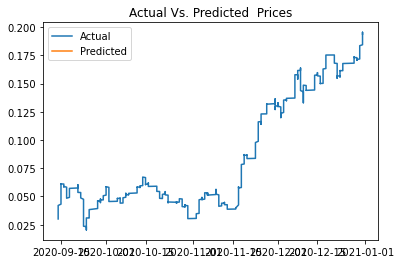

In [65]:
# Plot the real vs predicted prices as a line chart
stocks.plot(title="Actual Vs. Predicted  Prices")